Import Libraries

In [ ]:
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import math
import random
from matplotlib.pyplot import figure

Import Images

In [ ]:
imgXTrain = []
imgXTest = []
imgYTrain = []
imgYTest = []

#Train Images
for i in range(1,74):
  imgXTrain.append((Image.open("/content/drive/MyDrive/AUS/images/train/ct2-"+str(i)+".png")).convert('RGB'))
  imgYTrain.append((Image.open("/content/drive/MyDrive/AUS/annotations/train/ct2-"+str(i)+".png")).convert('RGB'))
for i in range(1,66):
  imgXTrain.append((Image.open("/content/drive/MyDrive/AUS/images/train/ct3-"+str(i)+".png")).convert('RGB'))
  imgYTrain.append((Image.open("/content/drive/MyDrive/AUS/annotations/train/ct3-"+str(i)+".png")).convert('RGB'))
for i in range(1,90):
  imgXTrain.append((Image.open("/content/drive/MyDrive/AUS/images/train/ct4-"+str(i)+".png")).convert('RGB'))
  imgYTrain.append((Image.open("/content/drive/MyDrive/AUS/annotations/train/ct4-"+str(i)+".png")).convert('RGB'))
for i in range(1,81):
  imgXTrain.append((Image.open("/content/drive/MyDrive/AUS/images/train/ct5-"+str(i)+".png")).convert('RGB'))
  imgYTrain.append((Image.open("/content/drive/MyDrive/AUS/annotations/train/ct5-"+str(i)+".png")).convert('RGB'))
for i in range(1,62):
  imgXTrain.append((Image.open("/content/drive/MyDrive/AUS/images/train/ct7-"+str(i)+".png")).convert('RGB'))
  imgYTrain.append((Image.open("/content/drive/MyDrive/AUS/annotations/train/ct7-"+str(i)+".png")).convert('RGB'))
for i in range(1,72):
  imgXTrain.append((Image.open("/content/drive/MyDrive/AUS/images/train/ct8-"+str(i)+".png")).convert('RGB'))
  imgYTrain.append((Image.open("/content/drive/MyDrive/AUS/annotations/train/ct8-"+str(i)+".png")).convert('RGB'))
for i in (np.append(range(1,7),range(8,76))):
  imgXTrain.append((Image.open("/content/drive/MyDrive/AUS/images/train/ct9-"+str(i)+".png")).convert('RGB'))
  imgYTrain.append((Image.open("/content/drive/MyDrive/AUS/annotations/train/ct9-"+str(i)+".png")).convert('RGB'))
for i in range(1,63):
  imgXTrain.append((Image.open("/content/drive/MyDrive/AUS/images/train/ct14-"+str(i)+".png")).convert('RGB'))
  imgYTrain.append((Image.open("/content/drive/MyDrive/AUS/annotations/train/ct14-"+str(i)+".png")).convert('RGB'))
for i in range(1,50):
  imgXTrain.append((Image.open("/content/drive/MyDrive/AUS/images/train/ct15-"+str(i)+".png")).convert('RGB'))
  imgYTrain.append((Image.open("/content/drive/MyDrive/AUS/annotations/train/ct15-"+str(i)+".png")).convert('RGB'))

#Test Images
for i in range(1,74):
  imgXTest.append((Image.open("/content/drive/MyDrive/AUS/images/test/ct1-"+str(i)+".png")).convert('RGB'))
  imgYTest.append((Image.open("/content/drive/MyDrive/AUS/annotations/test/ct1-"+str(i)+".png")).convert('RGB'))
for i in range(1,80):
  imgXTest.append((Image.open("/content/drive/MyDrive/AUS/images/test/ct10-"+str(i)+".png")).convert('RGB'))
  imgYTest.append((Image.open("/content/drive/MyDrive/AUS/annotations/test/ct10-"+str(i)+".png")).convert('RGB'))
for i in range(1,71):
  imgXTest.append((Image.open("/content/drive/MyDrive/AUS/images/test/ct11-"+str(i)+".png")).convert('RGB'))
  imgYTest.append((Image.open("/content/drive/MyDrive/AUS/annotations/test/ct11-"+str(i)+".png")).convert('RGB'))
for i in range(1,68):
  imgXTest.append((Image.open("/content/drive/MyDrive/AUS/images/test/ct12-"+str(i)+".png")).convert('RGB'))
  imgYTest.append((Image.open("/content/drive/MyDrive/AUS/annotations/test/ct12-"+str(i)+".png")).convert('RGB'))

Resize

In [ ]:
imgXTrainR = []
imgXTrainRTemp = []
imgXTestR = []
imgXTestRTemp = []
imgYTrainR = []
imgYTrainRTemp = []
imgYTestR = []
imgYTestRTemp = []

#Values to Remove
horizontal = np.floor(np.linspace(1,449,321, endpoint=False)).astype(int)
vertical = np.floor(np.linspace(1,464,336, endpoint=False)).astype(int)

for i in range(624):
  imgXTrainRTemp.append(np.delete(imgXTrain[i], vertical, axis=0))
  imgXTrainR.append(np.delete(imgXTrainRTemp[i], horizontal, axis=1))

  imgYTrainRTemp.append(np.delete(imgYTrain[i], vertical, axis=0))
  imgYTrainR.append(np.delete(imgYTrainRTemp[i], horizontal, axis=1))

for i in range(289):
  imgXTestRTemp.append(np.delete(imgXTest[i], vertical, axis=0))
  imgXTestR.append(np.delete(imgXTestRTemp[i], horizontal, axis=1))

  imgYTestRTemp.append(np.delete(imgYTest[i], vertical, axis=0))
  imgYTestR.append(np.delete(imgYTestRTemp[i], horizontal, axis=1))

Convert to Categorical

In [ ]:
imgYTrainT = np.empty(shape=(624, 128, 128), dtype='object')
imgYTestT = np.empty(shape=(289, 128, 128), dtype='object')

for i in range(624):
  for j in range(128):
    for k in range(128):
      if (imgYTrainR[i][j][k] == [0,0,0]).all():
        imgYTrainT[i][j][k] = 0
      elif (imgYTrainR[i][j][k] == [10,10,10]).all():
        imgYTrainT[i][j][k] = 0
      elif (imgYTrainR[i][j][k] == [100,0,100]).all():
        imgYTrainT[i][j][k] = 1
      elif (imgYTrainR[i][j][k] == [255,255,0]).all():
        imgYTrainT[i][j][k] = 2
      elif (imgYTrainR[i][j][k] == [0,0,255]).all():
        imgYTrainT[i][j][k] = 3
      elif (imgYTrainR[i][j][k] == [255,0,0]).all():
        imgYTrainT[i][j][k] = 4
      elif (imgYTrainR[i][j][k] == [0,255,255]).all():
        imgYTrainT[i][j][k] = 5
      elif (imgYTrainR[i][j][k] == [0,255,0]).all():
        imgYTrainT[i][j][k] = 6
      elif (imgYTrainR[i][j][k] == [255,255,255]).all():
        imgYTrainT[i][j][k] = 7
      elif (imgYTrainR[i][j][k] == [255,0,255]).all():
        imgYTrainT[i][j][k] = 8

for i in range(289):
  for j in range(128):
    for k in range(128):
      if (imgYTestR[i][j][k] == [0,0,0]).all():
        imgYTestT[i][j][k] = 0
      elif (imgYTestR[i][j][k] == [10,10,10]).all():
        imgYTestT[i][j][k] = 0
      elif (imgYTestR[i][j][k] == [100,0,100]).all():
        imgYTestT[i][j][k] = 1
      elif (imgYTestR[i][j][k] == [255,255,0]).all():
        imgYTestT[i][j][k] = 2
      elif (imgYTestR[i][j][k] == [0,0,255]).all():
        imgYTestT[i][j][k] = 3
      elif (imgYTestR[i][j][k] == [255,0,0]).all():
        imgYTestT[i][j][k] = 4
      elif (imgYTestR[i][j][k] == [0,255,255]).all():
        imgYTestT[i][j][k] = 5
      elif (imgYTestR[i][j][k] == [0,255,0]).all():
        imgYTestT[i][j][k] = 6
      elif (imgYTestR[i][j][k] == [255,255,255]).all():
        imgYTestT[i][j][k] = 7
      elif (imgYTestR[i][j][k] == [255,0,255]).all():
        imgYTestT[i][j][k] = 8

In [ ]:
imgYTrainT = imgYTrainT.tolist()
imgYTestT = imgYTestT.tolist()

Print Images

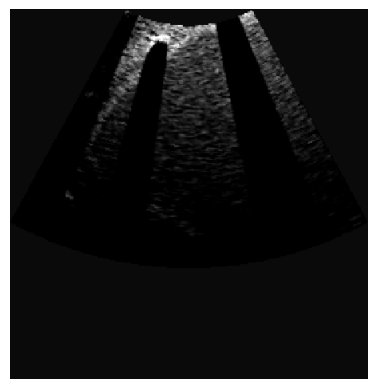

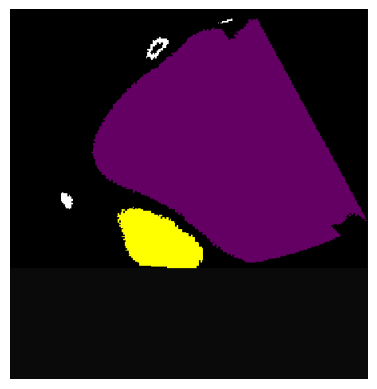

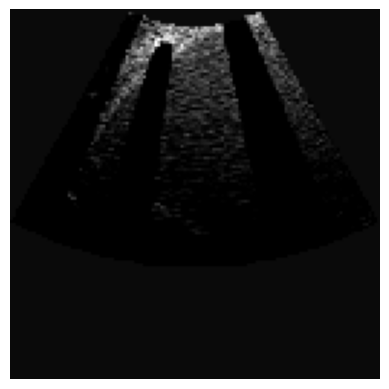

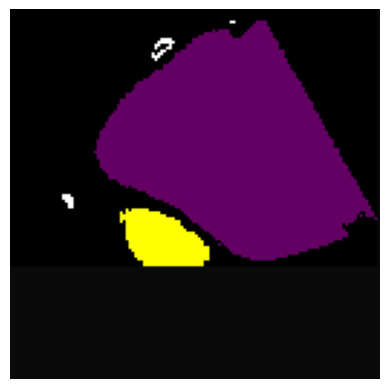

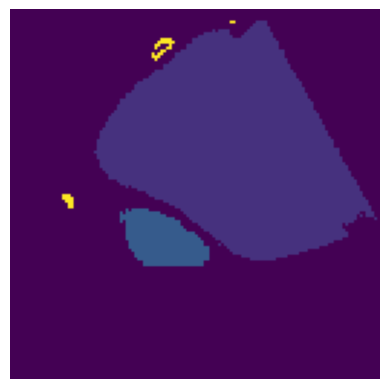

In [ ]:
j=7

plt.imshow(imgXTrain[j])
plt.axis('off')  # Turn off axis labels
plt.show()

plt.imshow(imgYTrain[j])
plt.axis('off')  # Turn off axis labels
plt.show()

plt.imshow(imgXTrainR[j])
plt.axis('off')  # Turn off axis labels
plt.show()

plt.imshow(imgYTrainR[j])
plt.axis('off')  # Turn off axis labels
plt.show()

plt.imshow(imgYTrainT[j])
plt.axis('off')  # Turn off axis labels
plt.show()

Decoder

In [ ]:
def decoder_block(x, y, filters):
    x = UpSampling2D()(x)
    x = Concatenate(axis = 3)([x,y])
    x = Conv2D(filters, 3, padding= 'same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv2D(filters, 3, padding= 'same')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)

    return x

Encoder

In [ ]:
def resnet50_unet(input_shape, *, classes, dropout):
    """ Input """
    inputs = Input(input_shape)

    resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)
    """ Encoder """
    s1 = resnet50.get_layer("input_layer").output
    s2 = resnet50.get_layer("conv1_relu").output
    s3 = resnet50.get_layer("conv2_block3_out").output
    s4 = resnet50.get_layer("conv3_block4_out").output

    x = resnet50.get_layer("conv4_block6_out").output

    """ Decoder """
    x = decoder_block(x, s4, 512)
    x = decoder_block(x, s3, 256)
    x = decoder_block(x, s2, 128)
    x = decoder_block(x, s1, 64)

    x = Dropout(dropout)(x)
    outputs = Conv2D(classes, 1, activation="softmax")(x)

    model = Model(inputs, outputs, name="ResNet50_U-Net")
    return model

if __name__ == "__main__":
    model = resnet50_unet((128, 128, 3), classes= 9, dropout= 0.4)
    #model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
opt = keras.optimizers.Adam()

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True), #True**
              metrics=['accuracy'])

In [ ]:
imgXTrainR = np.array(imgXTrainR)
imgYTrainT = np.array(imgYTrainT)

modelHistory = model.fit(
    x=imgXTrainR,
    y=imgYTrainT,
    epochs=40,
    validation_split = 0.3
)

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


14/14 ━━━━━━━━━━━━━━━━━━━━ 842s 57s/step - accuracy: 0.4555 - loss: 2.0062 - val_accuracy: 0.1575 - val_loss: 8240.2178
Epoch 2/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 798s 56s/step - accuracy: 0.8660 - loss: 0.9178 - val_accuracy: 0.1292 - val_loss: 4878.3306
Epoch 3/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 812s 56s/step - accuracy: 0.8869 - loss: 0.7334 - val_accuracy: 0.1609 - val_loss: 102.8747
Epoch 4/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 785s 56s/step - accuracy: 0.9104 - loss: 0.5529 - val_accuracy: 0.1421 - val_loss: 35.7694
Epoch 5/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 799s 56s/step - accuracy: 0.9139 - loss: 0.4888 - val_accuracy: 0.5520 - val_loss: 3.8372
Epoch 6/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 807s 57s/step - accuracy: 0.9239 - loss: 0.3968 - val_accuracy: 0.4059 - val_loss: 3.6495
Epoch 7/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 789s 56s/step - accuracy: 0.9225 - loss: 0.3705 - val_accuracy: 0.7247 - val_loss: 2.4751
Epoch 8/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 795s 55s/step - accuracy: 0.9340 - loss: 0.3154 - val_accuracy: 0.62

Predict Entire Test Set

In [ ]:
imgXTestR = np.array(imgXTestR)
imgYTestT = np.array(imgYTestT)

pred_mask = model.predict(imgXTestR)

10/10 ━━━━━━━━━━━━━━━━━━━━ 117s 11s/step


Take Index of Highest Probability Class

In [ ]:
highProbIndex = np.argmax(pred_mask, axis = 3)

Print U/S, True Segmentation, and Predicted Segmentation

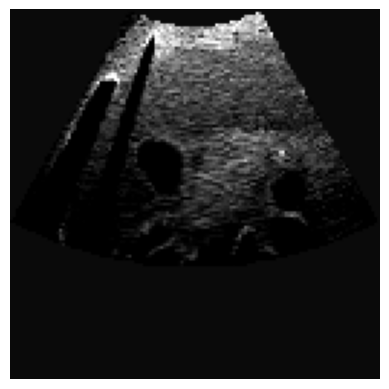

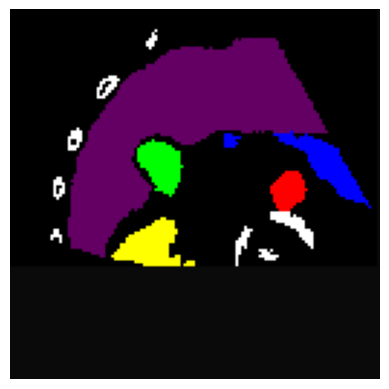

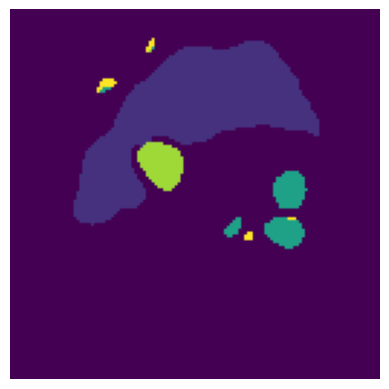

In [ ]:
r = random.randint(0, 289)

plt.imshow(imgXTestR[r])
plt.axis('off')  # Turn off axis labels
plt.show()

plt.imshow(imgYTestR[r])
plt.axis('off')  # Turn off axis labels
plt.show()

plt.imshow(highProbIndex[r])
plt.axis('off')  # Turn off axis labels
plt.show()

Training and Validation Accuracy and Loss

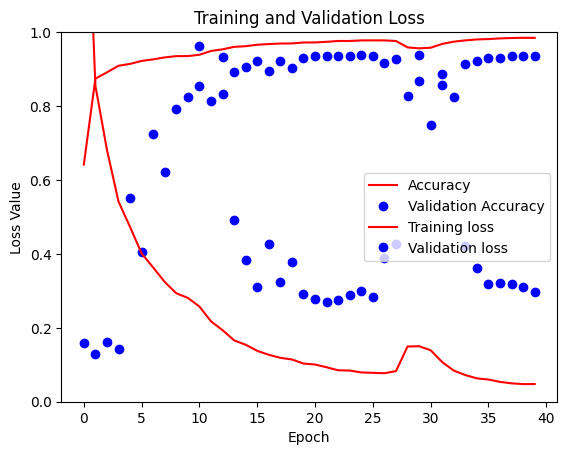

In [ ]:
acc = modelHistory.history['accuracy']
loss = modelHistory.history['loss']
val_acc = modelHistory.history['val_accuracy']
val_loss = modelHistory.history['val_loss']

plt.figure()
plt.plot(modelHistory.epoch, acc, 'r', label='Accuracy')
plt.plot(modelHistory.epoch, val_acc, 'bo', label='Validation Accuracy')
plt.plot(modelHistory.epoch, loss, 'r', label='Training loss')
plt.plot(modelHistory.epoch, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()